# Exercise 00 : Line chart

## Import

In [1]:
import pandas as pd
import sqlite3

## Connect to database

In [2]:
db_connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## Get all visit datetimes from `pageviews` table

In [3]:
sql_query = """
SELECT
    datetime
FROM
    pageviews
WHERE
    uid LIKE 'user_%'
"""

pageviews_datetimes_df = pd.read_sql(sql=sql_query, con=db_connect, parse_dates=['datetime'])
pageviews_datetimes_df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [4]:
pageviews_datetimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  987 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


## Count visits per date

In [5]:
pageviews_per_day_df = pageviews_datetimes_df.groupby(by=[pageviews_datetimes_df['datetime'].dt.date]).count()
pageviews_per_day_df.rename(columns={'datetime': 'views'}, inplace=True)
pageviews_per_day_df.head()

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [6]:
pageviews_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


## Using Pandas method *.plot()*, create a graph

<AxesSubplot: title={'center': 'Views per day'}, xlabel='datetime'>

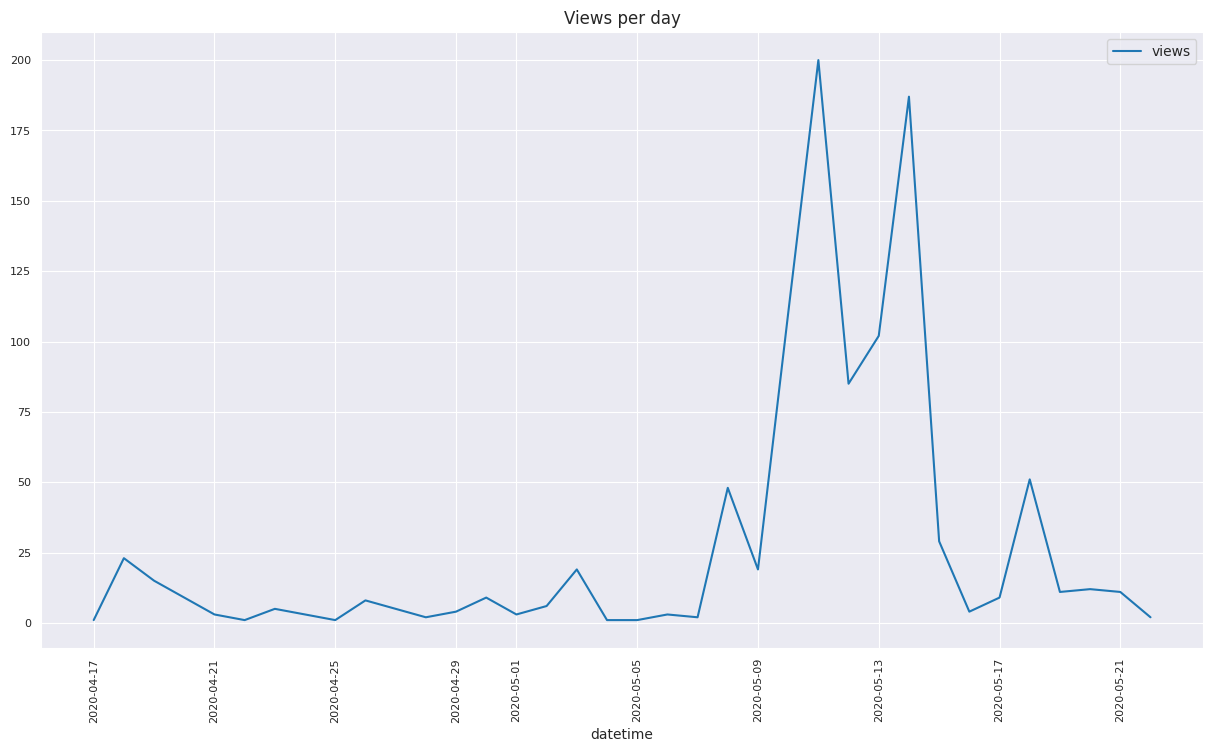

In [7]:
pageviews_per_day_df.plot(fontsize=8, figsize=(15,8), title='Views per day', rot=90)

## Close the connection to the database

In [8]:
db_connect.close()